# Neural Networks and neurons

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Neuron without the activation

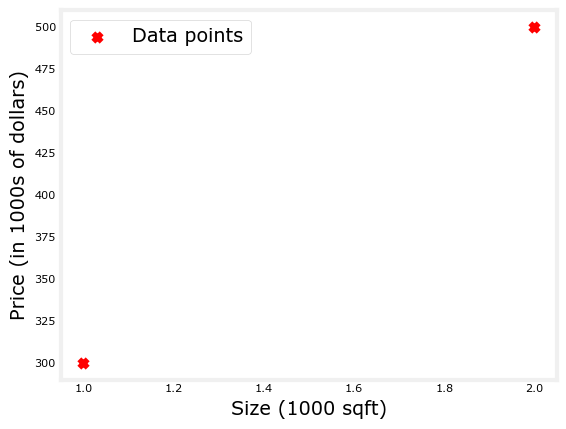

In [12]:
X_train = np.array([[1.0],[2.0]], dtype=np.float32) #1x2 matrix
y_train = np.array([[300.0], [500.0]], dtype=np.float32) #1x2 matrix

plt.scatter(X_train, y_train, marker='x', c='r', label = 'Data points')
plt.legend(fontsize = 'xx-large')
plt.ylabel("Price (in 1000s of dollars)", fontsize = 'xx-large')
plt.xlabel('Size (1000 sqft)', fontsize = 'xx-large')
plt.show()

In [13]:
linear_layer = tf.keras.layers.Dense(units = 1, activation='linear')

linear_layer.get_weights()

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.55]], shape=(1, 1), dtype=float32)


In [14]:
w,b = linear_layer.get_weights()

print(f"w: {w}, b: {b}")

w: [[1.55]], b: [0.]


In [15]:
set_w = np.array([[200]]) #1x1 matrix
set_b = np.array([100])

#set these weights
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [16]:
w, b = linear_layer.get_weights()
print(f"w: {w}, b: {b}")

w: [[200.]], b: [100.]


In [17]:
#using tensorflow
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

#using numpy for the same
alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [18]:
#prediction using tensorflow
prediction_tf = linear_layer(X_train)

#prediction using numpy
prediction_np = np.dot(X_train, set_w) + set_b

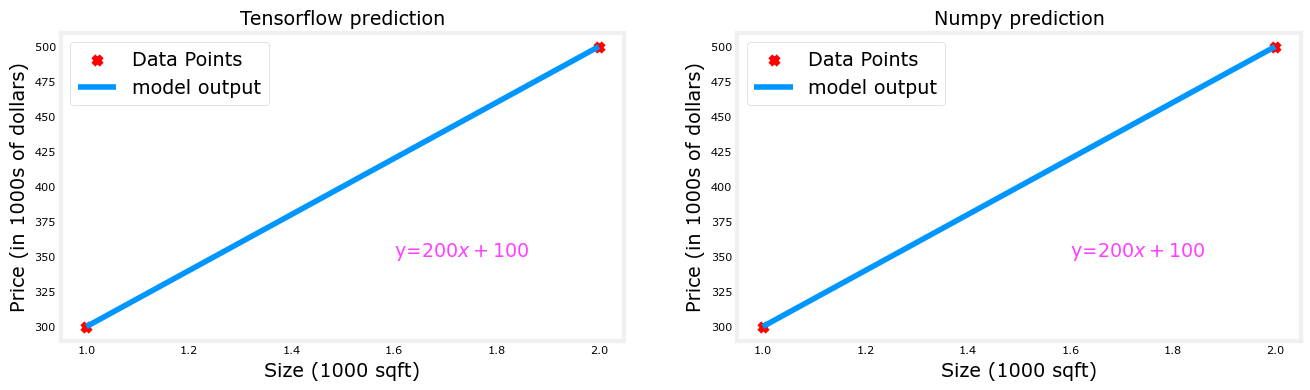

In [19]:
plt_linear(X_train, y_train, prediction_tf, prediction_np)

# Neuron with Sigmoid activation

g(x) = sigmoid(z)
where sigmoid(z) 1/ (1 + e^-z)

In [21]:
#dataset
X_train = np.array([0,1,2,3,4,5], dtype = np.float32).reshape(-1,1)
y_train = np.array([0,0,0,1,1,1], dtype = np.float32).reshape(-1,1)

pos = y_train == 1
neg = y_train == 0

X_train[pos]

array([3., 4., 5.], dtype=float32)

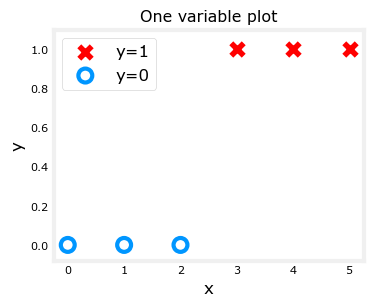

In [29]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.scatter(X_train[pos], y_train[pos], marker = 'x', s = 80, c = 'r', label = 'y=1')
ax.scatter(X_train[neg], y_train[neg], marker = 'o', s = 100, label = 'y=0', facecolors = 'none',
          edgecolors = dlc["dlblue"], lw=3)

ax.set_ylim(-.08, 1.1)
ax.set_ylabel('y', fontsize = 12)
ax.set_xlabel('x', fontsize = 12)

ax.set_title("One variable plot")
ax.legend(fontsize = 12)
plt.show()

# Logistic Neuron
This will use the sigmoid function

In [31]:
model = Sequential([tf.keras.layers.Dense(1, input_dim = 1, activation = 'sigmoid', name='L1')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()

print(f"w: {w}, b: {b}")
print(w.shape, b.shape)

w: [[1.06]], b: [0.]
(1, 1) (1,)


In [36]:
#randomly set the w and b values 
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])

print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]
